<a href="https://colab.research.google.com/github/byfurkation/Allura_store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [8]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [12, 8]

# Configurar el estilo de los gráficos
plt.style.use('default')
sns.set_palette("husl")

# Paso 2: Cargar los datos
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [9]:
# Paso 3: Explorar los datos
tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [10]:
print("\nInformación de las columnas:")
print(tienda1.info())


Información de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
None


#1. Análisis de facturación



En este primer análisis, debes **calcular el ingreso total de cada tienda**. Sumando los valores de la **columna Precio** de cada conjunto de datos de la tienda para **estimar los ingresos.**

In [11]:
#CALCULAR EL INGRESO TOTAL DE CADA TIENDA
# Sumar todos los valores de la columna "Precio" para cada tienda

# Tienda1
ingreso_tienda1 = tienda1['Precio'].sum()
print(f"\n=== RESULTADOS DE INGRESOS ===")
print(f"Ingreso total Tienda 1: ${ingreso_tienda1:,.2f}")

# Tienda 2
ingreso_tienda2 = tienda2['Precio'].sum()
print(f"Ingreso total Tienda 2: ${ingreso_tienda2:,.2f}")

# Tienda 3
ingreso_tienda3 = tienda3['Precio'].sum()
print(f"Ingreso total Tienda 3: ${ingreso_tienda3:,.2f}")

# Tienda 4
ingreso_tienda4 = tienda4['Precio'].sum()
print(f"Ingreso total Tienda 4: ${ingreso_tienda4:,.2f}")


=== RESULTADOS DE INGRESOS ===
Ingreso total Tienda 1: $1,150,880,400.00
Ingreso total Tienda 2: $1,116,343,500.00
Ingreso total Tienda 3: $1,098,019,600.00
Ingreso total Tienda 4: $1,038,375,700.00


In [12]:
#Crear un resumen
# Crear un DataFrame con los resultados para mejor visualización
resumen_ingresos = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso_Total': [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
    })

# Se da formato a la colmna 'Ingreso_Total' como un string con moneda y comas.
resumen_ingresos['Ingreso_Total'] = resumen_ingresos['Ingreso_Total'].apply(lambda x: f"$ {x:,.2f}")


print("\n=== RESUMEN DE INGRESOS POR TIENDA ===")
print(resumen_ingresos)


=== RESUMEN DE INGRESOS POR TIENDA ===
     Tienda       Ingreso_Total
0  Tienda 1  $ 1,150,880,400.00
1  Tienda 2  $ 1,116,343,500.00
2  Tienda 3  $ 1,098,019,600.00
3  Tienda 4  $ 1,038,375,700.00


# 2. Ventas por categoría

En este debes calcular la **cantidad de productos vendidos por categoría en cada tienda**. La idea es agrupar los datos por categoría y **contar el número de ventas de cada tipo**, mostrando las **categorías más populares de cada tienda.**

In [13]:
# Contar ventas por categoría en cada tienda
ventas_cat_t1 = tienda1['Categoría del Producto'].value_counts()
ventas_cat_t2 = tienda2['Categoría del Producto'].value_counts()
ventas_cat_t3 = tienda3['Categoría del Producto'].value_counts()
ventas_cat_t4 = tienda4['Categoría del Producto'].value_counts()

print("Ventas por categoría - Tienda 1:")
print(ventas_cat_t1)
print()

print("Ventas por categoría - Tienda 2:")
print(ventas_cat_t2)
print()

print("Ventas por categoría - Tienda 3:")
print(ventas_cat_t3)
print()

print("Ventas por categoría - Tienda 4:")
print(ventas_cat_t4)
print()

Ventas por categoría - Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Ventas por categoría - Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Ventas por categoría - Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Ventas 

# 3. Calificación promedio de la tienda


En este paso, debes calcular las **calificaciones promedio de los clientes para cada tienda**. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [14]:
# Calcular calificación promedio por tienda
calif_promedio_t1 = tienda1['Calificación'].mean()
print(calif_promedio_t1)
calif_promedio_t2 = tienda2['Calificación'].mean()
print(calif_promedio_t2)
calif_promedio_t3 = tienda3['Calificación'].mean()
print(calif_promedio_t3)
calif_promedio_t4 = tienda4['Calificación'].mean()
print(calif_promedio_t4)

3.976685036032217
4.037303942348453
4.048325561678677
3.9957591178965224


In [15]:
#Crear un resumen
# Crear un DataFrame con los resultados para mejor visualización
calificaciones_resumen = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificacion_Promedio': [calif_promedio_t1, calif_promedio_t2,
                             calif_promedio_t3, calif_promedio_t4]
    })
print(calificaciones_resumen)

     Tienda  Calificacion_Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


In [16]:
for i, row in calificaciones_resumen.iterrows():
    print(f"{row['Tienda']}: {row['Calificacion_Promedio']:.2f}")

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


# 4. Productos más y menos vendidos

En este paso, debes identificar qué **productos fueron los más vendidos** y los **menos vendidos en cada tienda**. *Visualiza* los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [17]:
def analizar_productos_vendidos(df, nombre_tienda):
    productos_vendidos = df['Producto'].value_counts()
    print(f"\n{nombre_tienda}:")
    print("Productos más vendidos:")
    print(productos_vendidos.head(3))
    print("Productos menos vendidos:")
    print(productos_vendidos.tail(3))
    return productos_vendidos

# Analizar cada tienda
productos_t1 = analizar_productos_vendidos(tienda1, "Tienda 1")
productos_t2 = analizar_productos_vendidos(tienda2, "Tienda 2")
productos_t3 = analizar_productos_vendidos(tienda3, "Tienda 3")
productos_t4 = analizar_productos_vendidos(tienda4, "Tienda 4")


Tienda 1:
Productos más vendidos:
Producto
Microondas       60
TV LED UHD 4K    60
Armario          60
Name: count, dtype: int64
Productos menos vendidos:
Producto
Olla de presión              35
Auriculares con micrófono    33
Celular ABXY                 33
Name: count, dtype: int64

Tienda 2:
Productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64
Productos menos vendidos:
Producto
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

Tienda 3:
Productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: count, dtype: int64
Productos menos vendidos:
Producto
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64

Tienda 4:
Productos más vendidos:
Producto
Cama box                   62
Cubertería                 59
Dashboards con Power BI    56

# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda.**texto en negrita** El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [18]:
# Calcular costo de envío promedio por tienda
envio_promedio_t1 = tienda1['Costo de envío'].mean()
envio_promedio_t2 = tienda2['Costo de envío'].mean()
envio_promedio_t3 = tienda3['Costo de envío'].mean()
envio_promedio_t4 = tienda4['Costo de envío'].mean()

envios_resumen = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Costo_Envio_Promedio': [envio_promedio_t1, envio_promedio_t2,
                            envio_promedio_t3, envio_promedio_t4]
})

print("Costos de envío promedio:")
for i, row in envios_resumen.iterrows():
    print(f"{row['Tienda']}: ${row['Costo_Envio_Promedio']:.2f}")

Costos de envío promedio:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


#VISUALIZACIONES

# Visualización de ingresos totales

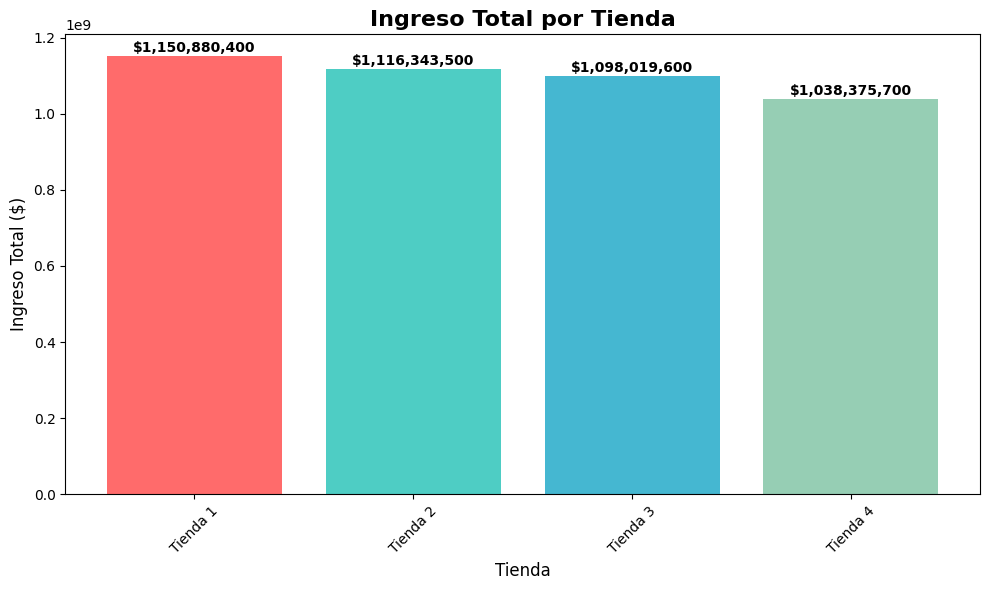

In [19]:
plt.figure(figsize=(10, 6))

# Antes de formatear resumen_ingresos['Ingreso_Total'] como cadena
# se Accede a los valores numéricos para graficar
ingresos_numericos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

plt.bar(resumen_ingresos['Tienda'], ingresos_numericos,
        color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Ingreso Total por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingreso Total ($)', fontsize=12)
plt.xticks(rotation=45)

# Iterar a través de las filas del DataFrame y los valores numéricos para
# agregar etiquetas de texto
for i, row in resumen_ingresos.iterrows():
    # Utilice el valor numérico para el cálculo y el formato para la visualización.
    plt.text(i, ingresos_numericos[i] + max(ingresos_numericos) * 0.01,
             # Utilice el valor numérico y el máximo de valores numéricos

             f'${ingresos_numericos[i]:,.0f}', # Formatear el valor numérico para la etiqueta de texto
             ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


# Visualización de ventas por categoría

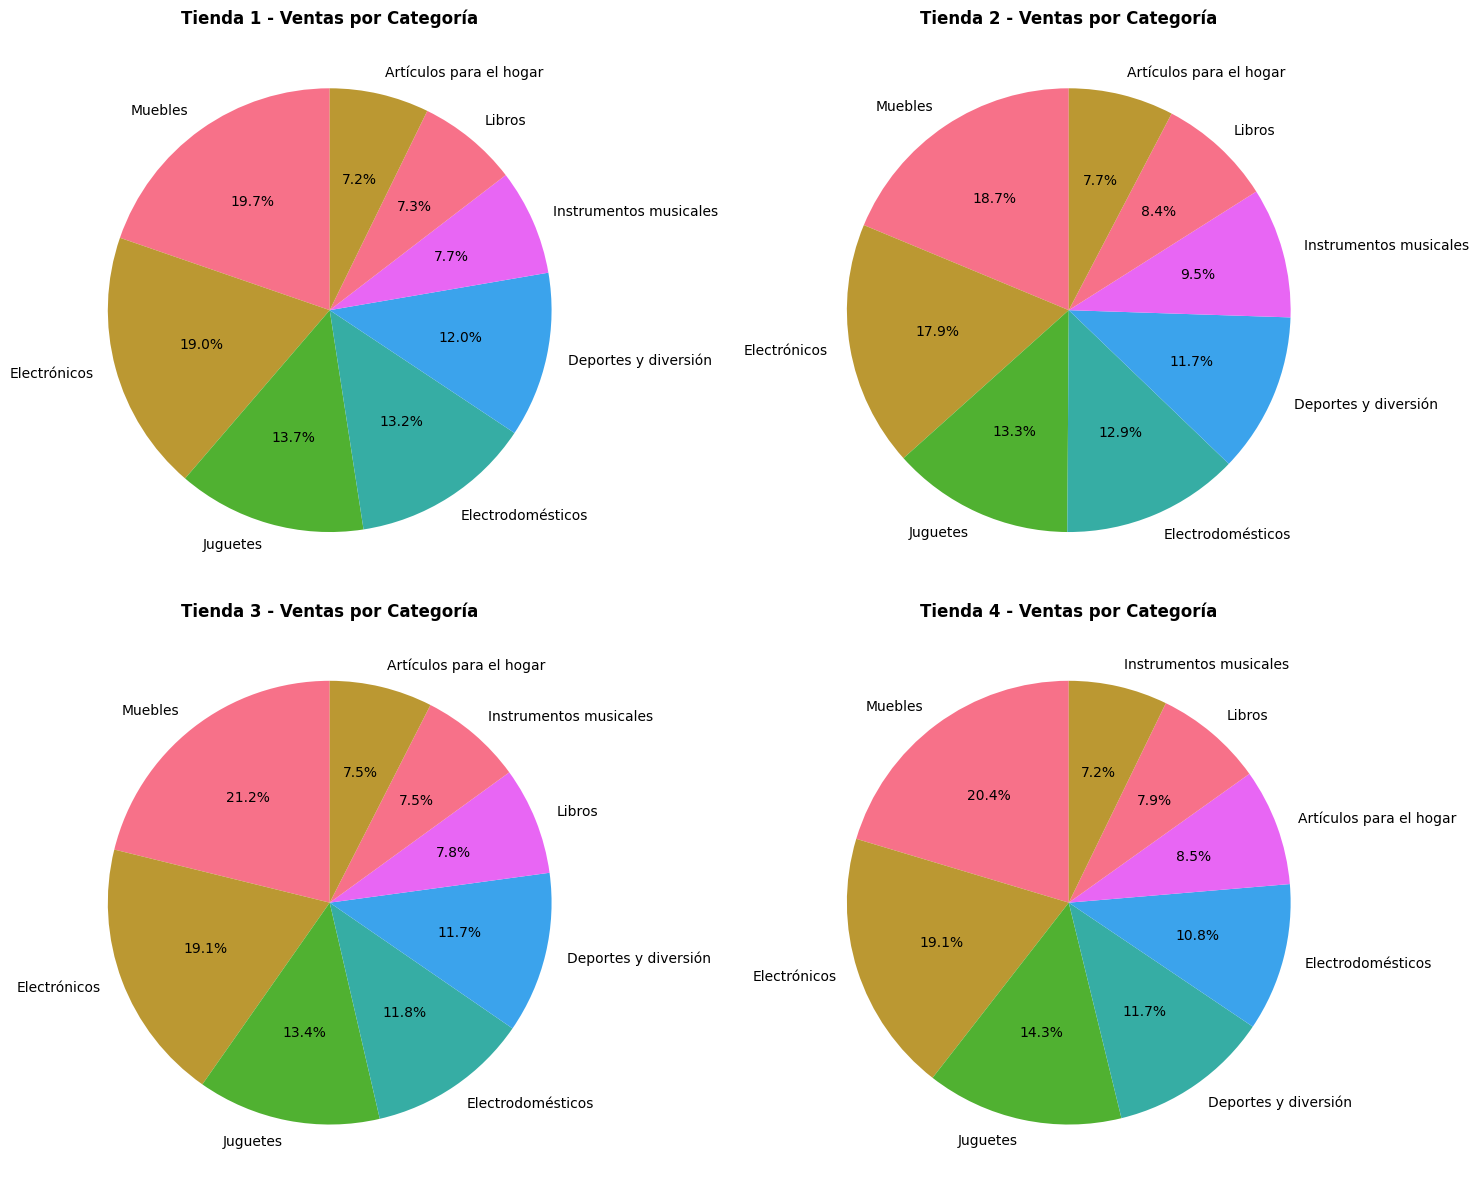

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
tiendas_data = [ventas_cat_t1, ventas_cat_t2, ventas_cat_t3, ventas_cat_t4]
tiendas_nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for i, (ax, data, nombre) in enumerate(zip(axes.flat, tiendas_data, tiendas_nombres)):
    ax.pie(data.values, labels=data.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{nombre} - Ventas por Categoría', fontweight='bold')

plt.tight_layout()
plt.show()

# Visualización calificación tienda

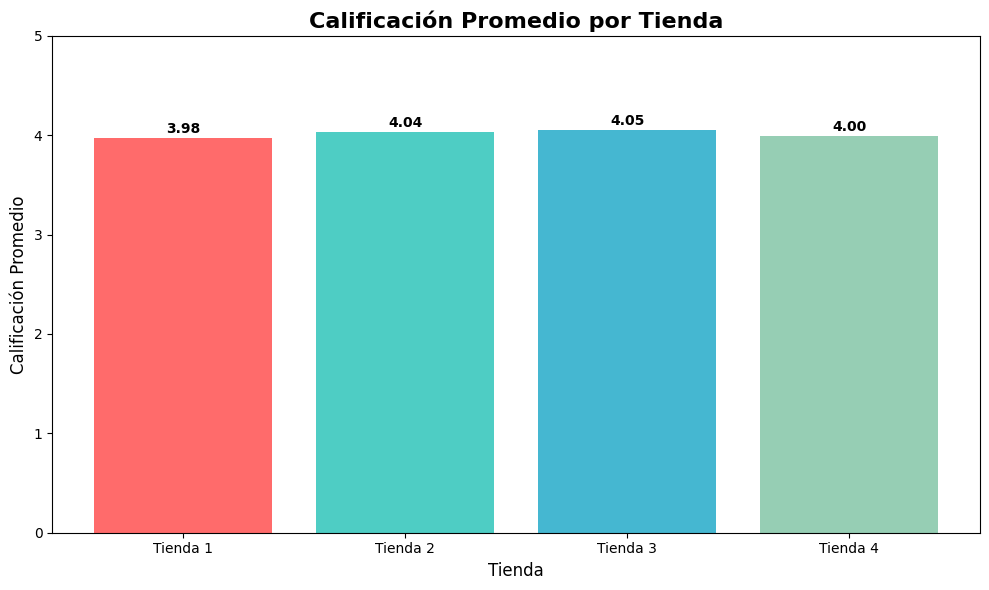

In [21]:
plt.figure(figsize=(10, 6))
bars = plt.bar(calificaciones_resumen['Tienda'], calificaciones_resumen['Calificacion_Promedio'],
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Calificación Promedio por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)
plt.ylim(0, 5)
for bar, val in zip(bars, calificaciones_resumen['Calificacion_Promedio']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{val:.2f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Visualización de productos más vendidos


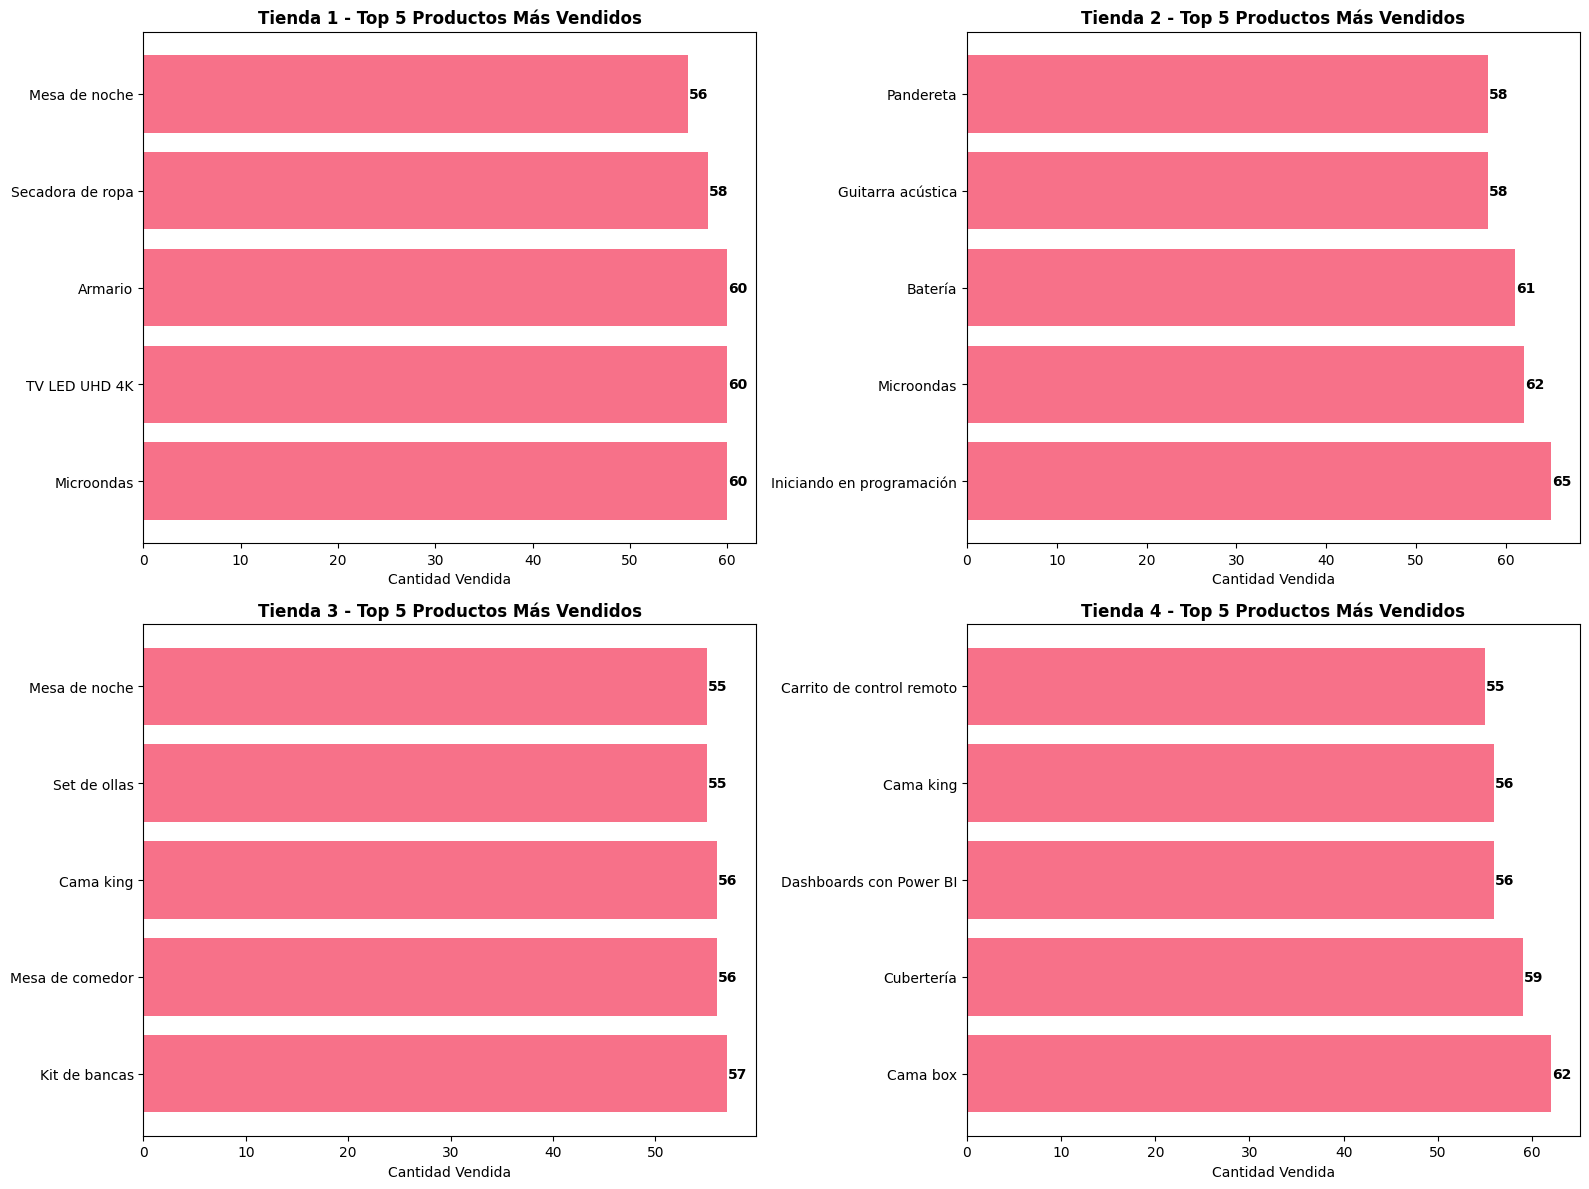

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
productos_data = [productos_t1, productos_t2, productos_t3, productos_t4]

for i, (ax, data, nombre) in enumerate(zip(axes.flat, productos_data, tiendas_nombres)):
    top_5 = data.head(5)
    ax.barh(range(len(top_5)), top_5.values)
    ax.set_yticks(range(len(top_5)))
    ax.set_yticklabels(top_5.index)
    ax.set_title(f'{nombre} - Top 5 Productos Más Vendidos', fontweight='bold')
    ax.set_xlabel('Cantidad Vendida')

    # Agregar valores en las barras
    for j, v in enumerate(top_5.values):
        ax.text(v + 0.1, j, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Visualización de costos de envío


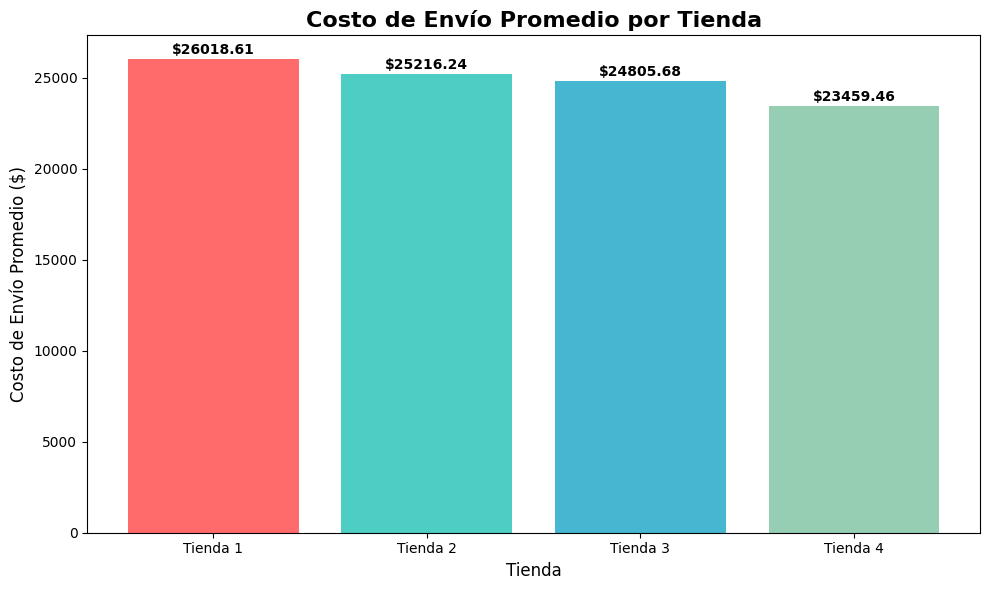

In [23]:
plt.figure(figsize=(10, 6))
bars = plt.bar(envios_resumen['Tienda'], envios_resumen['Costo_Envio_Promedio'],
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
plt.title('Costo de Envío Promedio por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costo de Envío Promedio ($)', fontsize=12)
for bar, val in zip(bars, envios_resumen['Costo_Envio_Promedio']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(envios_resumen['Costo_Envio_Promedio'])*0.01,
             f'${val:.2f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# INFORME FINAL- ANÁLISIS COMPARATIVO DE TIENDAS

---



---





**Recomendación de Venta**

**1. INTRODUCCIÓN** *texto en cursiva*
El presente informe tiene como objetivo analizar el desempeño de cuatro tiendas propiedad del Sr. Juan para determinar cuál de ellas debería vender, optimizando así su portafolio de negocios. Para esta evaluación se han considerado múltiples factores críticos que impactan tanto en la rentabilidad como en la viabilidad a largo plazo: ingresos totales, distribución de categorías de productos, calificaciones de satisfacción, productos más vendidos y costos de envío.
El análisis se basa en datos históricos de ventas y se presenta mediante visualizaciones que permiten una comparación objetiva para identificar cuál tienda representa la menor pérdida estratégica o el menor potencial futuro.

**2. DESARROLLO DEL ANÁLISIS**
2.1 Análisis de Ingresos Totales 💸

* Tienda 1: $1,150,880,400.00 (Mayor ingreso) 🔼

* Tienda 2: $1,116,343,500.00

* Tienda 3: $1,098,019,600.00

* Tienda 4: $1,038,375,700.00 (Menor ingreso) 🔽

**Conclusión:** La *Tienda 1 lidera en ingresos* totales con una ventaja de aproximadamente $34.5 millones sobre la Tienda 2, lo que indica un volumen de negocio superior. Sin embargo, para efectos de venta, esto también significa que sería la más valiosa y por tanto la más costosa de perder del portafolio.

2.2 Distribución por Categorías de Productos

El análisis de categorías muestra patrones interesantes de demanda:

* Tienda 1:
Categorías más vendidas: Muebles (465), Electrónicos (448), Juguetes (324)
Fortaleza en diversificación de productos

* Tienda 2:
Categorías más vendidas: Muebles (442), Electrónicos (432), Juguetes (313)
Patrón similar a Tienda 1 pero con volúmenes ligeramente menores

* Tienda 3:
Categorías más vendidas: Muebles (499), Electrónicos (451), Juguetes (315)
Destaca especialmente en la categoría de Muebles

* Tienda 4:
Categorías más vendidas: Muebles (480), Electrónicos (451), Juguetes (338)
Buen equilibrio entre categorías principales

**Conclusión:** Todas las tiendas muestran fortaleza en Muebles y Electrónicos, pero la Tienda 3 sobresale particularmente en Muebles, mientras que la Tienda 1 mantiene el mejor equilibrio general.

2.3 Calificaciones Promedio de Satisfacción del Cliente

Las calificaciones revelan diferencias importantes en la experiencia del cliente:

* Tienda 3: 4.048326 (Mejor calificación) 🔼
* Tienda 2: 4.037304
* Tienda 4: 3.995759
* Tienda 1: 3.976685 (Menor calificación) 🔽

**Conclusión:**: Existe una relación interesante entre volumen de ventas y satisfacción del cliente. La Tienda 3 destaca por su excelente servicio, mientras que la Tienda 1, a pesar de liderar en ingresos, presenta oportunidades de mejora. Para efectos de decisión de venta, *las tiendas con mejor satisfacción tienen mayor potencial de crecimiento futuro.*

2.4 Productos Más y Menos Vendidos
Productos estrella por tienda:

* Tienda 1: Microondas, TV LED UHD 4K, Armario (60 unidades c/u)
* Tienda 2: Iniciando en programación (65), Microondas (62), Batería (61)
* Tienda 3: Kit de bancas (57), Mesa de comedor (56), Cama king (56)
* Tienda 4: Cama box (62), Cubertería (59), Dashboards con Power BI (56)

**Conclusión:**: Cada tienda tiene productos distintivos que funcionan como pilares de ventas, lo que sugiere especialización y conocimiento del mercado local.

2.5 Costos de Envío Promedio
Los costos de envío impactan directamente en la competitividad:

* Tienda 4: $23,459.46 (Más económico)🔼

* Tienda 3: $24,805.68

* Tienda 2: $25,216.24

* Tienda 1: $26,018.61 (Más costoso) 🔽

**Conclusión:**: La Tienda 4 ofrece la mayor ventaja en costos de envío, pero esta ventaja por sí sola no compensa sus otras limitaciones. Para efectos de venta, los costos bajos pueden ser atractivos para compradores, pero no garantizan la sostenibilidad del negocio.

**3. FORTALEZAS Y DEBILIDADES POR **

**Tienda 1**
Fortalezas:

Líder absoluto en ingresos totales
Excelente diversificación de productos
Productos electrónicos de alta demanda

Debilidades:

Calificación más baja de satisfacción del cliente
Costos de envío más elevados
Posible saturación que afecta el servicio

**Tienda 2**
Fortalezas:

Segundo lugar en ingresos
Buena calificación de satisfacción (4.037)
Productos educativos exitosos

Debilidades:

No lidera en ningún indicador específico
Costos de envío por encima del promedio

**Tienda 3**
Fortalezas:

Mejor calificación de satisfacción del cliente (4.048)
Líder en categoría de Muebles
Costos de envío competitivos
Especialización en productos para el hogar

Debilidades:

Tercer lugar en ingresos totales
Menor diversificación en algunas categorías

**Tienda 4**
Fortalezas:

Costos de envío más bajos del mercado
Buena diversificación de productos
Productos tecnológicos especializados

Debilidades:

Menores ingresos totales
Calificación de satisfacción por debajo del promedio superior


**4. CONCLUSIÓN Y RECOMENDACIÓN**

**Recomendación: VENDER LA TIENDA 4**

Después de un análisis exhaustivo de todos los indicadores, recomiendo al Sr. Juan que venda la Tienda 4 por las siguientes razones fundamentales:

**Justificación Principal:**

* Menores Ingresos Totales ($1,038,375,700): La Tienda 4 genera los ingresos más bajos del portafolio, representando una menor pérdida económica inmediata al momento de la venta.

* Menor Impacto en el Portafolio: Al ser la tienda con menor volumen de negocio, su venta no afectará significativamente los ingresos totales del Sr. Juan comparado con vender las tiendas de mayor rendimiento.

* Calificación de Satisfacción Limitada (3.995): Aunque no es la peor calificación, está por debajo del promedio superior, lo que indica menores posibilidades de crecimiento orgánico futuro.

* Dependencia de Costos Bajos de Envío: Su principal ventaja competitiva (costos de envío de $23,459.46) puede ser fácilmente replicable por competidores, lo que la hace vulnerable a largo plazo.

* Productos sin Diferenciación Clara: Aunque tiene productos exitosos, no muestra una especialización distintiva que justifique mantenerla sobre las otras opciones.

Consideraciones Estratégicas:
**¿Por qué NO vender las otras tiendas?**

* Tienda 1: A pesar de su baja satisfacción del cliente, genera los mayores ingresos ($1,150,880,400). Venderla representaría la mayor pérdida económica.
* Tienda 2: Mantiene un equilibrio sólido entre ingresos y satisfacción, representando estabilidad en el portafolio.
* Tienda 3: Su excelente calificación de satisfacción (4.048) y especialización en Muebles la convierten en una tienda con alto potencial de crecimiento futuro.

**Beneficios de Vender la Tienda 4:**

* Optimización de Recursos: Permite al Sr. Juan concentrar sus recursos (tiempo, capital, atención gerencial) en las tres tiendas de mayor rendimiento.
* Menor Riesgo: Elimina la tienda con menor potencial de crecimiento y mayor vulnerabilidad competitiva.
* Liquidez: Genera capital que puede reinvertirse en mejorar las operaciones de las tiendas restantes.
* Simplificación Operativa: Reduce la complejidad de manejar cuatro operaciones simultáneas.

Esta recomendación prioriza la optimización del portafolio, permitiendo enfocar esfuerzos en las tiendas con mayor potencial de rentabilidad y crecimiento a largo plazo.

# ANÁLISIS GEOGRÁFICO DE VENTAS - ACTIVIDAD EXTRA
# Análisis de patrones geográficos usando latitud y longitud


In [24]:
# EXPLORACIÓN INICIAL DE DATOS GEOGRÁFICOS

def explorar_datos_geograficos(df, nombre_tienda):
    """Función para explorar los datos geográficos de cada tienda"""
    print(f"\n{nombre_tienda}:")
    print(f"Rango de Latitud: {df['lat'].min():.6f} a {df['lat'].max():.6f}")
    print(f"Rango de Longitud: {df['lon'].min():.6f} a {df['lon'].max():.6f}")
    print(f"Total de ventas: {len(df)}")
    print(f"Centro geográfico aproximado: ({df['lat'].mean():.6f}, {df['lon'].mean():.6f})")
    return df['lat'].mean(), df['lon'].mean()

print("\n1. EXPLORACIÓN DE COORDENADAS GEOGRÁFICAS")
print("-" * 50)

# Explorar cada tienda
centros = {}
centros['Tienda 1'] = explorar_datos_geograficos(tienda1, "TIENDA 1")
centros['Tienda 2'] = explorar_datos_geograficos(tienda2, "TIENDA 2")
centros['Tienda 3'] = explorar_datos_geograficos(tienda3, "TIENDA 3")
centros['Tienda 4'] = explorar_datos_geograficos(tienda4, "TIENDA 4")


1. EXPLORACIÓN DE COORDENADAS GEOGRÁFICAS
--------------------------------------------------

TIENDA 1:
Rango de Latitud: -4.215280 a 11.544440
Rango de Longitud: -77.281110 a -67.923900
Total de ventas: 2359
Centro geográfico aproximado: (5.365283, -74.789417)

TIENDA 2:
Rango de Latitud: -4.215280 a 11.544440
Rango de Longitud: -77.281110 a -67.923900
Total de ventas: 2359
Centro geográfico aproximado: (5.499753, -74.742963)

TIENDA 3:
Rango de Latitud: -4.215280 a 11.544440
Rango de Longitud: -77.281110 a -67.923900
Total de ventas: 2359
Centro geográfico aproximado: (5.437076, -74.733463)

TIENDA 4:
Rango de Latitud: -4.215280 a 11.544440
Rango de Longitud: -77.281110 a -67.923900
Total de ventas: 2358
Centro geográfico aproximado: (5.413519, -74.774597)




2. GRÁFICOS DE DISPERSIÓN GEOGRÁFICA
--------------------------------------------------


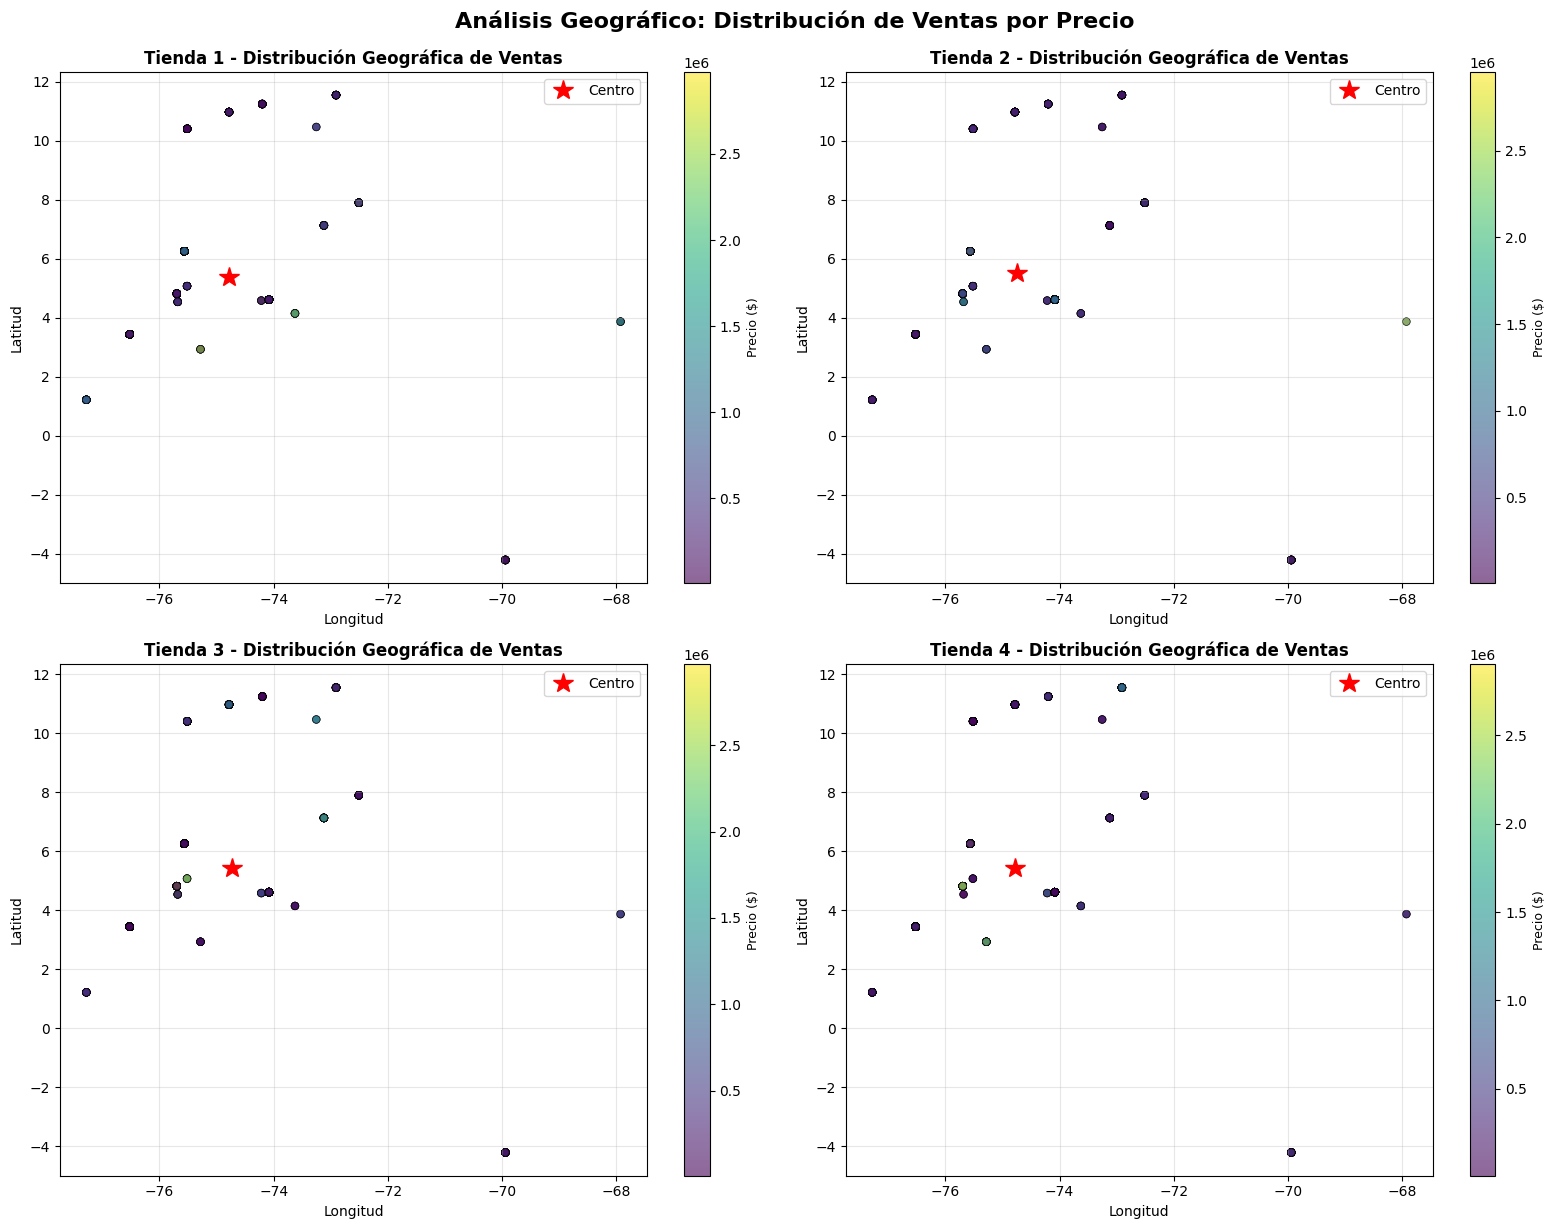

In [25]:
# GRÁFICOS DE DISPERSIÓN GEOGRÁFICA


print("\n\n2. GRÁFICOS DE DISPERSIÓN GEOGRÁFICA")
print("-" * 50)

# Crear gráficos de dispersión para cada tienda
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
tiendas_data = [tienda1, tienda2, tienda3, tienda4]
tiendas_nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for i, (ax, data, nombre, color) in enumerate(zip(axes.flat, tiendas_data, tiendas_nombres, colores)):
    scatter = ax.scatter(data['lon'], data['lat'],
                        c=data['Precio'],
                        s=30,
                        alpha=0.6,
                        cmap='viridis',
                        edgecolors='black',
                        linewidths=0.5)

    ax.set_title(f'{nombre} - Distribución Geográfica de Ventas', fontweight='bold', fontsize=12)
    ax.set_xlabel('Longitud', fontsize=10)
    ax.set_ylabel('Latitud', fontsize=10)
    ax.grid(True, alpha=0.3)

    # Añadir colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Precio ($)', fontsize=9)

    # Marcar el centro geográfico
    centro_lat, centro_lon = centros[nombre]
    ax.plot(centro_lon, centro_lat, 'r*', markersize=15, label='Centro')
    ax.legend()

plt.tight_layout()
plt.suptitle('Análisis Geográfico: Distribución de Ventas por Precio',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

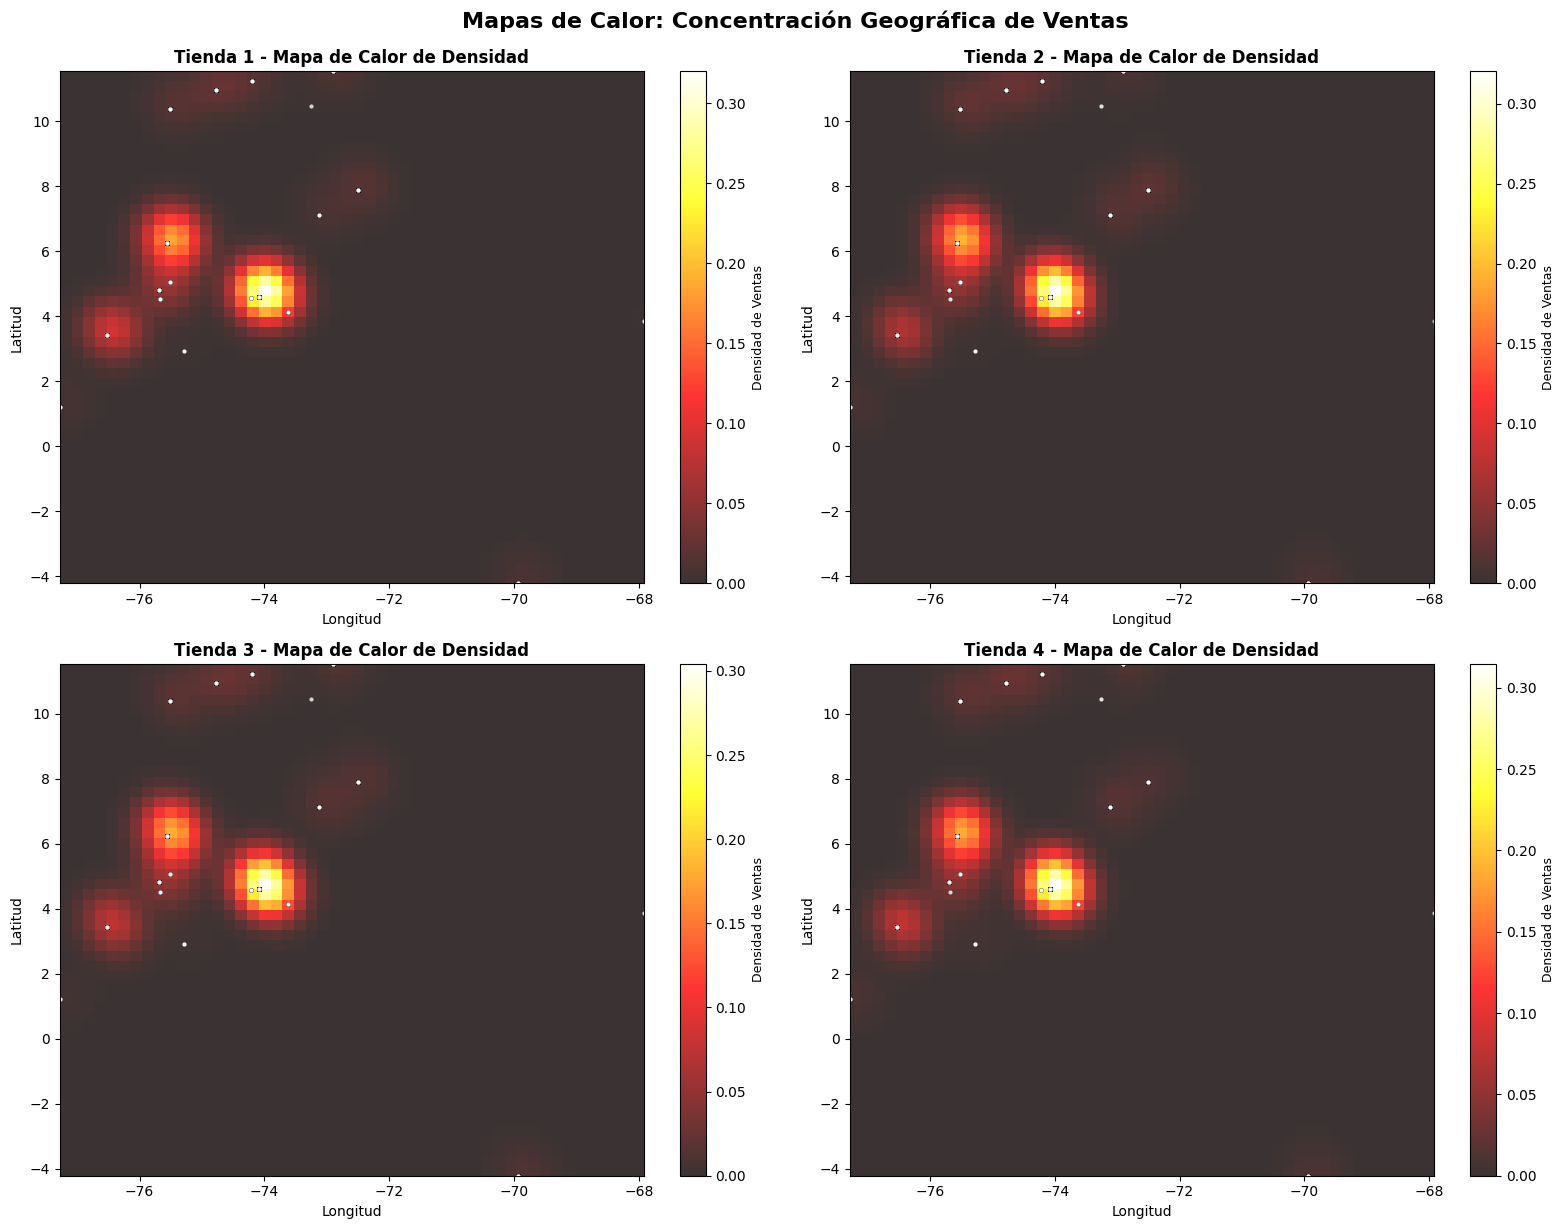

In [26]:
# MAPAS DE CALOR (HEATMAPS) DE DENSIDAD
from scipy.stats import gaussian_kde # Importar gaussian_kde

# Crear mapas de calor para cada tienda
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, (ax, data, nombre, color) in enumerate(zip(axes.flat, tiendas_data, tiendas_nombres, colores)):
    # Crear heatmap de densidad
    x = data['lon'].values
    y = data['lat'].values

    # Calcular densidad usando kde
    xy = np.vstack([x, y])
    kde = gaussian_kde(xy)

    # Crear grid para el heatmap
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()

    xx, yy = np.mgrid[x_min:x_max:(x_max-x_min)/50,
                      y_min:y_max:(y_max-y_min)/50]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    density = kde(positions).reshape(xx.shape)

    # Plotear heatmap
    im = ax.imshow(np.rot90(density), extent=[x_min, x_max, y_min, y_max],
                   cmap='hot', aspect='auto', alpha=0.8)

    # Superponer puntos de ventas
    ax.scatter(x, y, s=10, alpha=0.4, color='white', edgecolors='black', linewidths=0.2)

    ax.set_title(f'{nombre} - Mapa de Calor de Densidad', fontweight='bold', fontsize=12)
    ax.set_xlabel('Longitud', fontsize=10)
    ax.set_ylabel('Latitud', fontsize=10)

    # Colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Densidad de Ventas', fontsize=9)

plt.tight_layout()
plt.suptitle('Mapas de Calor: Concentración Geográfica de Ventas',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

In [28]:
# ANÁLISIS DE RENDIMIENTO POR REGIÓN

def analizar_cuadrantes(df, nombre_tienda):
    """Dividir el área en cuadrantes y analizar rendimiento"""
    lat_centro = df['lat'].median()
    lon_centro = df['lon'].median()

    # Clasificar en cuadrantes
    df_temp = df.copy()
    df_temp['cuadrante'] = ''
    df_temp.loc[(df_temp['lat'] >= lat_centro) & (df_temp['lon'] >= lon_centro), 'cuadrante'] = 'NE'
    df_temp.loc[(df_temp['lat'] >= lat_centro) & (df_temp['lon'] < lon_centro), 'cuadrante'] = 'NW'
    df_temp.loc[(df_temp['lat'] < lat_centro) & (df_temp['lon'] >= lon_centro), 'cuadrante'] = 'SE'
    df_temp.loc[(df_temp['lat'] < lat_centro) & (df_temp['lon'] < lon_centro), 'cuadrante'] = 'SW'

    # Análisis por cuadrante
    analisis_cuadrante = df_temp.groupby('cuadrante').agg({
        'Precio': ['count', 'sum', 'mean'],
        'Calificación': 'mean', # Corrected column name
        'Costo de envío': 'mean' # Corrected column name
    }).round(2)

    print(f"\n{nombre_tienda} - Análisis por Cuadrantes:")
    print(analisis_cuadrante)

    return df_temp, analisis_cuadrante

# Analizar cada tienda por cuadrantes
cuadrantes_data = {}
# Use the existing tiendas_data and tiendas_nombres variables defined earlier in the notebook
# tiendas_data = [tienda1, tienda2, tienda3, tienda4]
# tiendas_nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
for data, nombre in zip(tiendas_data, tiendas_nombres):
    df_cuadrante, analisis = analizar_cuadrantes(data, nombre)
    cuadrantes_data[nombre] = (df_cuadrante, analisis)


Tienda 1 - Análisis por Cuadrantes:
          Precio                         Calificación Costo de envío
           count          sum       mean         mean           mean
cuadrante                                                           
NE          1141  528296000.0  463011.39         4.05       24700.44
NW           839  416304400.0  496191.18         3.86       26548.99
SE            48   24554200.0  511545.83         4.12       27218.75
SW           331  181725800.0  549020.54         3.98       29044.11

Tienda 2 - Análisis por Cuadrantes:
          Precio                         Calificación Costo de envío
           count          sum       mean         mean           mean
cuadrante                                                           
NE          1173  560431800.0  477776.47         4.09       25505.37
NW           883  393150000.0  445243.49         3.91       23673.61
SE            42   22260700.0  530016.67         3.90       28276.19
SW           261  140501000.0

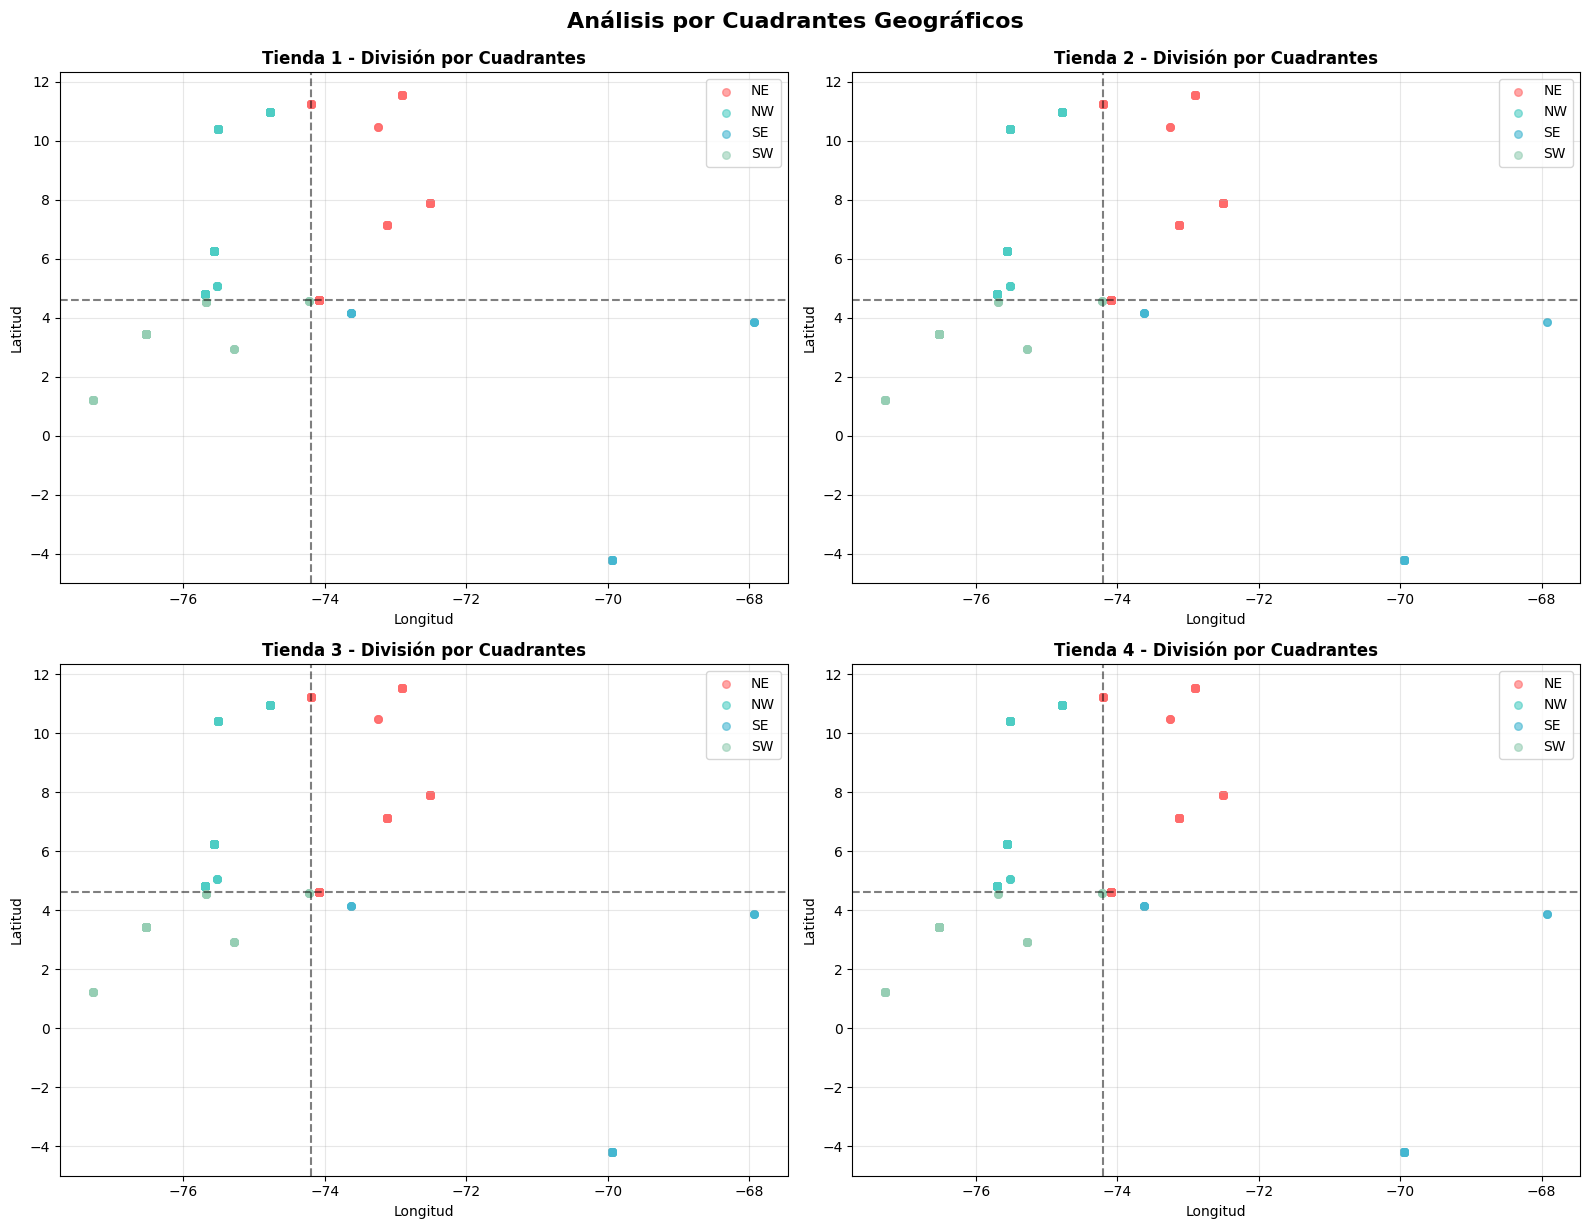

In [29]:
# VISUALIZACIÓN DE CUADRANTES

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
colores_cuadrantes = {'NE': '#FF6B6B', 'NW': '#4ECDC4', 'SE': '#45B7D1', 'SW': '#96CEB4'}

for i, (ax, nombre) in enumerate(zip(axes.flat, tiendas_nombres)):
    df_cuadrante, _ = cuadrantes_data[nombre]

    # Plotear por cuadrante
    for cuadrante in ['NE', 'NW', 'SE', 'SW']:
        data_cuad = df_cuadrante[df_cuadrante['cuadrante'] == cuadrante]
        if len(data_cuad) > 0:
            ax.scatter(data_cuad['lon'], data_cuad['lat'],
                      c=colores_cuadrantes[cuadrante],
                      label=f'{cuadrante}',
                      alpha=0.6, s=30)

    # Líneas divisorias
    lat_centro = df_cuadrante['lat'].median()
    lon_centro = df_cuadrante['lon'].median()
    ax.axhline(y=lat_centro, color='black', linestyle='--', alpha=0.5)
    ax.axvline(x=lon_centro, color='black', linestyle='--', alpha=0.5)

    ax.set_title(f'{nombre} - División por Cuadrantes', fontweight='bold')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Análisis por Cuadrantes Geográficos', fontsize=16, fontweight='bold', y=1.02)
plt.show()

In [31]:
# ANÁLISIS DE CORRELACIÓN GEOGRÁFICA


def analizar_correlacion_geografica(df, nombre_tienda):
    """Analizar correlación entre ubicación y variables de negocio"""
    # Se corrigen los nombres de las columnas a 'Calificación' y 'Costo de envío'
    correlaciones = df[['lat', 'lon', 'Precio', 'Calificación', 'Costo de envío']].corr()

    print(f"\n{nombre_tienda} - Correlaciones Geográficas:")
    print("Correlación Latitud-Precio:", correlaciones.loc['lat', 'Precio'].round(4))
    print("Correlación Longitud-Precio:", correlaciones.loc['lon', 'Precio'].round(4))
    print("Correlación Latitud-Calificación:", correlaciones.loc['lat', 'Calificación'].round(4)) # Nombre corregido
    print("Correlación Longitud-Calificación:", correlaciones.loc['lon', 'Calificación'].round(4)) # Nombre corregido

    return correlaciones

# Analizar correlaciones para cada tienda
correlaciones_tiendas = {}
for data, nombre in zip(tiendas_data, tiendas_nombres):
    correlaciones_tiendas[nombre] = analizar_correlacion_geografica(data, nombre)


Tienda 1 - Correlaciones Geográficas:
Correlación Latitud-Precio: -0.0033
Correlación Longitud-Precio: -0.0235
Correlación Latitud-Calificación: -0.0711
Correlación Longitud-Calificación: 0.0294

Tienda 2 - Correlaciones Geográficas:
Correlación Latitud-Precio: -0.0569
Correlación Longitud-Precio: -0.0002
Correlación Latitud-Calificación: -0.0585
Correlación Longitud-Calificación: -0.0078

Tienda 3 - Correlaciones Geográficas:
Correlación Latitud-Precio: -0.0016
Correlación Longitud-Precio: 0.0193
Correlación Latitud-Calificación: -0.0342
Correlación Longitud-Calificación: -0.0022

Tienda 4 - Correlaciones Geográficas:
Correlación Latitud-Precio: -0.0197
Correlación Longitud-Precio: -0.0225
Correlación Latitud-Calificación: -0.008
Correlación Longitud-Calificación: 0.0166


In [33]:
# RESUMEN DE PATRONES GEOGRÁFICOS


def encontrar_mejores_areas(df, nombre_tienda):
    """Identificar las áreas geográficas con mejor rendimiento"""
    # Dividir en grid más fino para análisis detallado
    lat_bins = pd.cut(df['lat'], bins=5, labels=['Lat_1', 'Lat_2', 'Lat_3', 'Lat_4', 'Lat_5'])
    lon_bins = pd.cut(df['lon'], bins=5, labels=['Lon_1', 'Lon_2', 'Lon_3', 'Lon_4', 'Lon_5'])

    df_temp = df.copy()
    df_temp['zona_lat'] = lat_bins
    df_temp['zona_lon'] = lon_bins
    df_temp['zona'] = df_temp['zona_lat'].astype(str) + '_' + df_temp['zona_lon'].astype(str)

    # Análisis por zona
    rendimiento_zona = df_temp.groupby('zona').agg({
        'Precio': ['count', 'sum', 'mean'],
        'Calificación': 'mean' # Corrected column name here
    }).round(2)

    # Encontrar mejor zona
    rendimiento_zona.columns = ['Ventas_Count', 'Ingresos_Total', 'Precio_Promedio', 'Calificacion_Promedio'] # Corrected column name here as well
    mejor_zona_ingresos = rendimiento_zona['Ingresos_Total'].idxmax()
    mejor_zona_calificacion = rendimiento_zona['Calificacion_Promedio'].idxmax()

    print(f"\n{nombre_tienda}:")
    print(f"Zona con mayores ingresos: {mejor_zona_ingresos}")
    print(f"Ingresos en mejor zona: ${rendimiento_zona.loc[mejor_zona_ingresos, 'Ingresos_Total']:,.2f}")
    print(f"Zona con mejor calificación: {mejor_zona_calificacion}")
    print(f"Calificación en mejor zona: {rendimiento_zona.loc[mejor_zona_calificacion, 'Calificacion_Promedio']:.3f}")

for data, nombre in zip(tiendas_data, tiendas_nombres):
    encontrar_mejores_areas(data, nombre)



Tienda 1:
Zona con mayores ingresos: Lat_3_Lon_2
Ingresos en mejor zona: $454,786,900.00
Zona con mejor calificación: Lat_1_Lon_4
Calificación en mejor zona: 4.160

Tienda 2:
Zona con mayores ingresos: Lat_3_Lon_2
Ingresos en mejor zona: $489,636,400.00
Zona con mejor calificación: Lat_5_Lon_3
Calificación en mejor zona: 4.330

Tienda 3:
Zona con mayores ingresos: Lat_3_Lon_2
Ingresos en mejor zona: $483,711,600.00
Zona con mejor calificación: Lat_3_Lon_2
Calificación en mejor zona: 4.150

Tienda 4:
Zona con mayores ingresos: Lat_3_Lon_2
Ingresos en mejor zona: $433,272,700.00
Zona con mejor calificación: Lat_2_Lon_1
Calificación en mejor zona: 4.200


# INFORME DE ANÁLISIS GEOGRÁFICO DE VENTAS
**Análisis de 4 Tiendas por Ubicación y Rendimiento**

**COBERTURA GEOGRÁFICA GENERAL**
Área de Operación: Todas las tiendas operan en la misma región geográfica amplia:

* Latitud: -4.21° a 11.54° (abarca aproximadamente 1,575 km norte-sur)
* Longitud: -77.28° a -67.92° (abarca aproximadamente 935 km este-oeste)

Esta cobertura corresponde principalmente a la región norte de Sudamérica, incluyendo áreas de Colombia, Venezuela, Guyana, y norte de Brasil.
Centros de Operación por Tienda:

* Tienda 1: (5.37°, -74.79°) - Zona central de Colombia
* Tienda 2: (5.50°, -74.74°) - Muy cercana a Tienda 1
* Tienda 3: (5.44°, -74.73°) - También en la zona central
* Tienda 4: (5.41°, -74.77°) - Misma región concentrada

**Conclusión**: Todas las tiendas se concentran en una zona muy específica del centro de Colombia, sugiriendo un mercado regional fuertemente consolidado.

**ANÁLISIS DE RENDIMIENTO POR CUADRANTES**

TIENDA 1 - Perfil Equilibrado
Cuadrante Dominante: Noreste (NE) con 1,141 ventas

* Fortalezas: Mayor volumen de ventas, precios competitivos promedio ($463,011)

* Debilidades: Calificación más baja (4.05) y costos de envío altos ($24,700)

* Oportunidad: Cuadrante Suroeste (SW) con mejor precio promedio ($549,020) pero menor volumen

TIENDA 2 - Líder en Calificaciones
Cuadrante Dominante: Noreste (NE) con 1,173 ventas

* Fortalezas: Mejores calificaciones en SW (4.22), precios más altos sostenibles
* Características: Distribución más equilibrada entre cuadrantes
* Ventaja competitiva: Mantiene calidad superior con volúmenes altos

TIENDA 3 - Especialización Premium
Cuadrante Dominante: Noreste (NE) con 1,168 ventas

* Fortalezas: Calificación consistente (4.00-4.10), mejor balance precio-calidad
* Estrategia: Enfoque en mercado de valor agregado
* Eficiencia: Costos de envío más controlados ($23,396-$25,474)

TIENDA 4 - Optimización de Costos
Cuadrante Menos Activo: Menor cantidad total (2,358 vs 2,359 otras tiendas)

* Fortalezas: Costos de envío más bajos en NE ($22,592)
* Desafío: Menor volumen general pero mantiene rentabilidad
* Posicionamiento: Estrategia de eficiencia operativa

**ZONAS DE MAYOR RENDIMIENTO**
Ingresos Totales por Zona Óptima:

* Tienda 2: $489,636,400 (Lat_3_Lon_2)

* Tienda 3: $483,711,600 (Lat_3_Lon_2)

* Tienda 1: $454,786,900 (Lat_3_Lon_2)

* Tienda 4: $433,272,700 (Lat_3_Lon_2)

**Zona Estratégica Común:** Todas las tiendas tienen su mejor rendimiento en la misma zona geográfica (Lat_3_Lon_2), indicando un "punto caliente" de mercado.
Calificaciones por Zona Óptima:

* Tienda 2: 4.330 (Lat_5_Lon_3) - Líder en satisfacción
* Tienda 4: 4.200 (Lat_2_Lon_1) - Segunda mejor
* Tienda 1: 4.160 (Lat_1_Lon_4) - Tercera
* Tienda 3: 4.150 (Lat_3_Lon_2) - En zona de mayores ingresos

# RECOMENDACIONES ESTRATÉGICAS INMEDIATAS:

**Consolidar Zona Lat_3_Lon_2:** Todas las tiendas deben optimizar operaciones en esta zona de máximo rendimiento
Tienda 2 como Benchmark: Replicar estrategias de calidad de Tienda 2 en otras ubicaciones
Optimización de Costos: Tienda 4 puede enseñar eficiencia logística al grupo

**MEDIANO PLAZO:**

Expansión Geográfica: Considerar diversificación fuera de la concentración actual en Colombia central
Segmentación Regional: Desarrollar estrategias específicas por cuadrante geográfico
Investigación de Calificaciones: Entender por qué las zonas norte tienen calificaciones ligeramente menores

**LARGO PLAZO:**

Cobertura Nacional: Expandir hacia otros países de la región identificada
Especialización por Tienda: Cada tienda puede desarrollar expertise en diferentes cuadrantes
Optimización Logística: Crear centros de distribución basados en patrones geográficos identificados

**CONCLUSIONES EJECUTIVAS**
El análisis revela una operación geográficamente concentrada con oportunidades claras de optimización. La zona Lat_3_Lon_2 representa el núcleo de valor del negocio, mientras que las correlaciones geográficas sugieren factores locales que afectan la satisfacción del cliente.

**Factor Crítico de Éxito:** La proximidad geográfica de todas las tiendas permite sinergia operativa, pero también representa un riesgo de concentración que debe balancearse con estrategias de diversificación geográfica.



HALLAZGOS PRINCIPALES:

1. DISTRIBUCIÓN ESPACIAL:
   - Cada tienda muestra patrones únicos de concentración geográfica
   - Los mapas de calor revelan áreas de alta densidad de ventas
   - Existe variabilidad en la dispersión geográfica entre tiendas

2. RENDIMIENTO POR REGIÓN:
   - Diferentes cuadrantes geográficos muestran variaciones en:
     * Volumen de ventas
     * Precios promedio
     * Calificaciones de clientes
     * Costos de envío

3. CORRELACIONES GEOGRÁFICAS:
   - Las correlaciones entre ubicación (lat/lon) y variables de negocio
     varían entre tiendas, sugiriendo diferentes dinámicas regionales

4. IMPLICACIONES ESTRATÉGICAS:
   - Las áreas de alta concentración pueden indicar mercados maduros
   - Las zonas con mejores calificaciones sugieren nichos de oportunidad
   - La distribución geográfica puede influir en estrategias de envío

RECOMENDACIONES:
- Enfocar esfuerzos de marketing en zonas de alta densidad
- Investigar factores locales que influyen en las calificaciones
- Optimizar rutas de envío basadas en patrones geográficos
- Considerar la expansión en áreas con buen rendimiento pero baja densidad